## Proyecto del Día 13 - Juego de Navegación en un Laberinto

Este proyecto tiene como objetivo desarrollar un entorno de laberinto simple y aplicar un algoritmo de **Aprendizaje por Refuerzo** para enseñar a una IA a navegar desde un punto inicial hasta un objetivo.

Dada la naturaleza de este proyecto, considero que el algoritmo más adecuado para este tipo de probleas es **Q-Learning**, por su facilidad de implelentación y comprensión, su estabilidad y su relación entre la exploración y la explotación.

Por esa razón te propongo resolverlo usando ese algoritmo, aunque dejo a tu criterio si quieres resolverlo con otro algoritmo de tu elección. Siempre estaré a favor de que investigues, y expandas las habilidades propuestas por tu cuenta.

### Descripción del Laberinto:

El laberinto se representa como una matriz de dos dimensions, donde cada elemento puede ser:
+ un camino libre (0)
+ un obstáculo (1)
+ el objetivo (G)

La tarea es desarrollar un agente que pueda aprender a encontrar el camino desde un punto de inicio hasta el objetivo evitando obstáculos.


### Creación del Laberinto

Debido a que el desafío de hoy es bastante complejo, y que el objetivo final no se trata de que sepas desarrollar laberintos, sino sistemas para resolverlos, voy a facilitar la tarea entregando en este cuaderno el código para generar nuestros laberintos.

Tu parte será la siguiente, que es diseñar y entrenar un modelo de Q-Learning para resolver el laberinto de la manera mpas eficiente, y luego mostrar una visualización sobre cómo lo ha hecho.

Te deseo toda la suerte del mundo, y sobre todo, que te diviertas de a montones.

In [121]:
# Librerías necesarias para todo el ejercicio
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython.display import clear_output

In [92]:
# Función para crear el laberinto
def crear_laberinto(tamanio, porcentaje_paredes=20, inicio=(0, 0), meta=None):
    laberinto = np.zeros((tamanio, tamanio))
    numero_paredes = int((tamanio * tamanio) * porcentaje_paredes / 100)
    
    # Ubicar paredes
    for pared in range(numero_paredes):
        x, y = random.randint(0, tamanio-1), random.randint(0, tamanio-1)
        
        # Cuidar que inicio y meta no sean paredes
        if (x, y) != inicio and (meta is None or (x, y) != meta):
            laberinto[x, y] = 1
            
    # Ubicar la meta
    if meta:
        laberinto[meta] = 9  # Representa la meta con 9
    else:
        # Ubicar la meta aleatoriamente si no está especificado
        while True:
            x, y = random.randint(0, tamanio-1), random.randint(0, tamanio-1)
            if laberinto[x, y] == 0 and (x, y) != inicio:
                laberinto[x, y] = 9
                break
    
    return laberinto

In [3]:
# Función para visualizar el laberinto
def ver_laberinto(laberinto):
    plt.figure(figsize=(5, 5))
    plt.imshow(laberinto, cmap='hot', interpolation='nearest')
    plt.colorbar();

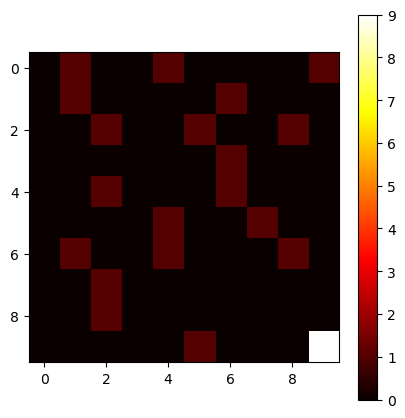

In [131]:
# Ejemplo de crear y mostrar laberintos
laberinto = crear_laberinto(10, 20, inicio=(0, 0), meta=(9, 9))
ver_laberinto(laberinto)

### Ahora te toca a ti

Lo que sigue es implementar todo el código para que un algoritmo de Q-Learning encuentre la manera más eficiente de llegar a la meta. Voy a dejarte los pasos que considero que son los necesarios para lograrlo

##### 1. Parámetros para el algoritmo Q-Learning

In [132]:
dimensiones = laberinto.shape
estado_inicial = (0, 0)
estado_objetivo = (9,9)
acciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [133]:
num_estados = dimensiones[0] * dimensiones[1]
num_acciones = len(acciones)
Q = np.zeros((num_estados, num_acciones))

alpha = 0.1
gamma = 0.99
epsilon = 0.2
episodios = 100

##### 2. Función para elegir acciones equilibrando entre explotación y exploración

In [134]:
def elegir_accion(estado):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(num_acciones))
    else:
        return np.argmax(Q[estado_a_indice(estado)])

##### 3. Función para simular la acción en el laberinto

In [135]:
def encontrar_obstaculos(laberinto):
    obstaculos = []
    for row in range(0,laberinto.shape[0]):
        for col in range(0,laberinto.shape[1]):
            if laberinto[row,col] == 1:
                obstaculos.append((row,col))
    
    return tuple(obstaculos)
obstaculos = encontrar_obstaculos(laberinto)

In [136]:
def aplicar_accion(estado, accion_idx):
    accion = acciones[accion_idx]
    nuevo_estado = tuple(np.add(estado, accion) % dimensiones)
    
    if nuevo_estado in obstaculos or nuevo_estado == estado:
        return estado, -100, False
    if nuevo_estado == estado_objetivo:
        return nuevo_estado, 100, True
    return nuevo_estado, -1, False

##### 4. Función principal para ejecutar el algoritmo Q-Learning

##### 5. Función para convertir coordenadas a índice lineal

In [137]:
def estado_a_indice(estado):
    return estado[0] * dimensiones[1] + estado[1]

##### 6. Iniciar el laberinto y configurar el algoritmo Q-Learning

In [138]:
for episodio in range(episodios):
    estado = estado_inicial
    terminado = False
    
    while not terminado:
        idx_estado = estado_a_indice(estado)
        accion_idx = elegir_accion(estado)
        nuevo_estado, recompensa, terminado = aplicar_accion(estado, accion_idx)
        idx_nuevo_estado = estado_a_indice(nuevo_estado)
        
        Q[idx_estado, accion_idx] = Q[idx_estado, accion_idx] + alpha * (recompensa + gamma * np.max(Q[idx_nuevo_estado]) - Q[idx_estado, accion_idx])
        
        estado = nuevo_estado

##### 7. Función para mostrar el aprendizaje del agente

In [139]:
politica = np.zeros(dimensiones, dtype=int)
salida = np.zeros(dimensiones, dtype=str)
for i in range(dimensiones[0]):
    for j in range(dimensiones[1]):
        estado = (i, j)
        idx_estado = estado_a_indice(estado)
        mejor_accion = np.argmax(Q[idx_estado])
        actions_sym = ['↑', '↓', '←', '→']
        politica[i, j] = mejor_accion
        salida[i,j] = actions_sym[mejor_accion]
        
print("Política aprendida (0: arriba, 1: abajo, 2: izquierda, 3: derecha)")
print(salida)


Política aprendida (0: arriba, 1: abajo, 2: izquierda, 3: derecha)
[['↑' '↑' '←' '↓' '↑' '↑' '←' '←' '→' '↑']
 ['↑' '↑' '↑' '→' '→' '↑' '↑' '→' '↑' '←']
 ['↑' '↓' '↑' '←' '↓' '↑' '→' '↑' '↑' '→']
 ['↓' '↓' '→' '↓' '←' '←' '↑' '→' '→' '→']
 ['→' '←' '↑' '↑' '↑' '←' '↑' '→' '←' '→']
 ['→' '→' '←' '↓' '↑' '→' '→' '↑' '→' '←']
 ['←' '↑' '↑' '↓' '↑' '→' '↑' '←' '↑' '↑']
 ['←' '↓' '↑' '↓' '↓' '↓' '←' '→' '↓' '↓']
 ['↓' '→' '↑' '↓' '↑' '↑' '↓' '←' '→' '↓']
 ['←' '←' '←' '↓' '↓' '↑' '↑' '←' '→' '↑']]


In [140]:
print(laberinto)

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 9.]]


##### 8. Visualizar el resultado

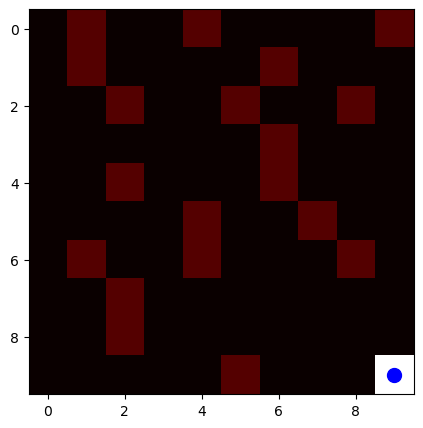

(9, 9)


In [141]:
terminado = False
estado = estado_inicial

while not terminado:
    clear_output(wait=True)
    fig,ax = plt.subplots(figsize=(5,5))
    ax.clear()
    ax.imshow(laberinto, cmap='hot', interpolation='nearest')
    ax.plot(estado[1],estado[0],"bo",markersize=10)
    plt.show()
    
    if estado == estado_objetivo:
        terminado = True
    
    else:
        accion = acciones[politica[estado[0],estado[1]]]
        estado = tuple(np.add(estado, accion) % dimensiones)
        
    plt.pause(0.001)
    time.sleep(2)
    print(estado)
    

In [99]:
accion = acciones[politica[estado[0],estado[1]]]
accion

(0, -1)